<a href="https://colab.research.google.com/github/DCI-alxogm/ml2023-JuanLeonelSantamariaMena/blob/main/ProyectoFinal/Proyecto_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Proyecto Final

---


#Machine Learning

#### Juan Leonel Santamaria Mena

---
## Identificación de Lenguaje de Señas usando Redes Neuronales



---


#abstrad
 En este notebook se presenta el Proyecto Final correspondiente al curso de Machine Learning del Ago-Dic 2023, esté se presentan las herramientas adquiridas en el presente curso con la finalidad de desarrollar una red neuronal capas de identificar las diferentes letra del lenguaje de señas.

#Justificación

El lenguaje de señas es una forma crucial de comunicación para la comunidad sorda, pero a menudo se enfrenta a barreras cuando se interactúa con personas que no comprenden este sistema. Implementar una red neuronal para reconocer y comprender el lenguaje de señas puede tener un impacto positivo en la vida diaria de las personas sordas, permitiéndoles una comunicación más fluida y efectiva con aquellos que no conocen este idioma visual.

La tecnología de reconocimiento de lenguaje de señas basada en redes neuronales puede superar las limitaciones de la comunicación tradicional, proporcionando una herramienta que traduce de manera precisa los gestos y movimientos específicos del lenguaje de señas a un formato comprensible para aquellos que no lo conocen. Esto no solo facilita la comunicación interactiva, sino que también promueve la inclusión social y profesional de las personas con discapacidad auditiva al eliminar las barreras lingüísticas.


Marco Teorico

* Alto Sesgo (High Bias):
  * Características:
    * El modelo es demasiado simple y no puede capturar la complejidad de los datos de entrenamiento.
    * Tiende a hacer suposiciones fuertes y simplificadoras sobre la relación entre las variables.
  * Impacto:
    * El modelo tendrá un rendimiento deficiente tanto en los datos de entrenamiento como en los datos de prueba.
    * Subestima la verdadera relación subyacente en los datos.

  
* Baja Varianza (Low Variance):
  * Características:
    * El modelo es robusto y no es muy sensible a pequeñas variaciones en los datos de entrenamiento.
    * Generaliza bien a nuevos datos.
  * Impacto:
    * El rendimiento en los datos de entrenamiento y prueba es consistente.
    * Aunque puede tener un buen rendimiento en datos bien conocidos, puede no capturar patrones más complejos.

* Bajo Sesgo (Low Bias):
  * Características:
    * El modelo es más complejo y puede capturar patrones más sutiles en los datos.
    * No hace suposiciones fuertes y simplificadoras.
  * Impacto:
    * Puede tener un buen rendimiento en los datos de entrenamiento y capturar patrones complejos.
    * Sin embargo, puede ser sensible a ruido y variaciones en los datos, lo que puede llevar a un rendimiento deficiente en datos no vistos.
* Alta Varianza (High Variance):
  * Características:
    * El modelo es muy sensible a las fluctuaciones en los datos de entrenamiento.
    * Puede ajustarse demasiado a los datos específicos de entrenamiento.
  * Impacto:
    * Puede tener un rendimiento excelente en los datos de entrenamiento, pero puede generalizar mal a nuevos datos.
    * Es propenso a sobreajuste (overfitting).


Trade-off:
Existe un trade-off entre sesgo y varianza. En general, se busca un equilibrio que minimice el error total del modelo. Un modelo con sesgo y varianza moderados suele ser preferible para lograr una buena generalización a nuevos datos. Este equilibrio se conoce como el "punto óptimo" en el dilema sesgo-varianza. En la práctica, encontrar este punto óptimo puede requerir ajustes en la complejidad del modelo y la cantidad de datos de entrenamiento.

# Visualizacion de Imagenes

## Librerias

In [114]:
# librerias
import sys
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.python.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Flatten,Activation,Convolution2D,MaxPooling2D,BatchNormalization,MaxPool2D

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
from scipy import ndimage
import pandas as pd

import glob
%matplotlib inline
#acceso a drive
from google.colab import drive
drive.mount('/content/drive')

#numero de pixceles
num_px=28

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Conjuntos

In [ ]:
#Conjunto de entrenamiento
train_name = np.array([])
train_labels = np.array([])
train_img=[]
files = glob.glob('/content/drive/MyDrive/UGTO/DCI-data/lenguaje/train*')
etiquetas = pd.read_csv(f'/content/drive/MyDrive/UGTO/DCI-data/lenguaje/train/_annotations.csv')
train_name = np.append(train_name,np.array(etiquetas['filename']))
train_labels = np.append(train_labels,np.array( etiquetas['class']))
for i in etiquetas['filename']:
    img=Image.open(f'/content/drive/MyDrive/UGTO/DCI-data/lenguaje/train/{i}')
    img = img.convert('L')
    img=img.resize((num_px,num_px))
    data=np.asarray(img)
    train_img.append(data.astype(np.float32))

train_img=np.array(train_img, dtype=np.uint8)

In [ ]:
# Conjunto de prueba
test_name = np.array([])
test_labels = np.array([])
test_img=[]
files = glob.glob('/content/drive/MyDrive/UGTO/DCI-data/lenguaje/test*')
etiquetas = pd.read_csv(f'/content/drive/MyDrive/UGTO/DCI-data/lenguaje/test/_annotations.csv')
test_name = np.append(test_name,np.array(etiquetas['filename']))
test_labels = np.append(test_labels,np.array( etiquetas['class']))
for i in etiquetas['filename']:
    img=Image.open(f'/content/drive/MyDrive/UGTO/DCI-data/lenguaje/test/{i}')
    img = img.convert('L')
    img=img.resize((num_px,num_px))
    data=np.asarray(img)
    test_img.append(data.astype(np.float32))

test_img=np.array(test_img, dtype=np.uint8)

In [90]:
# Conjunto de Validación
valid_name = np.array([])
valid_labels = np.array([])
valid_img=[]
files = glob.glob('/content/drive/MyDrive/UGTO/DCI-data/lenguaje/valid*')
etiquetas = pd.read_csv(f'/content/drive/MyDrive/UGTO/DCI-data/lenguaje/valid/_annotations.csv')
valid_name = np.append(valid_name,np.array(etiquetas['filename']))
valid_labels = np.append(valid_labels,np.array( etiquetas['class']))
for i in etiquetas['filename']:
    img=Image.open(f'/content/drive/MyDrive/UGTO/DCI-data/lenguaje/valid/{i}')
    #img = img.convert('L')
    img=img.resize((num_px,num_px))
    data=np.asarray(img)
    valid_img.append(data.astype(np.float32))

valid_img=np.array(valid_img, dtype=np.uint8)

## Imagenes

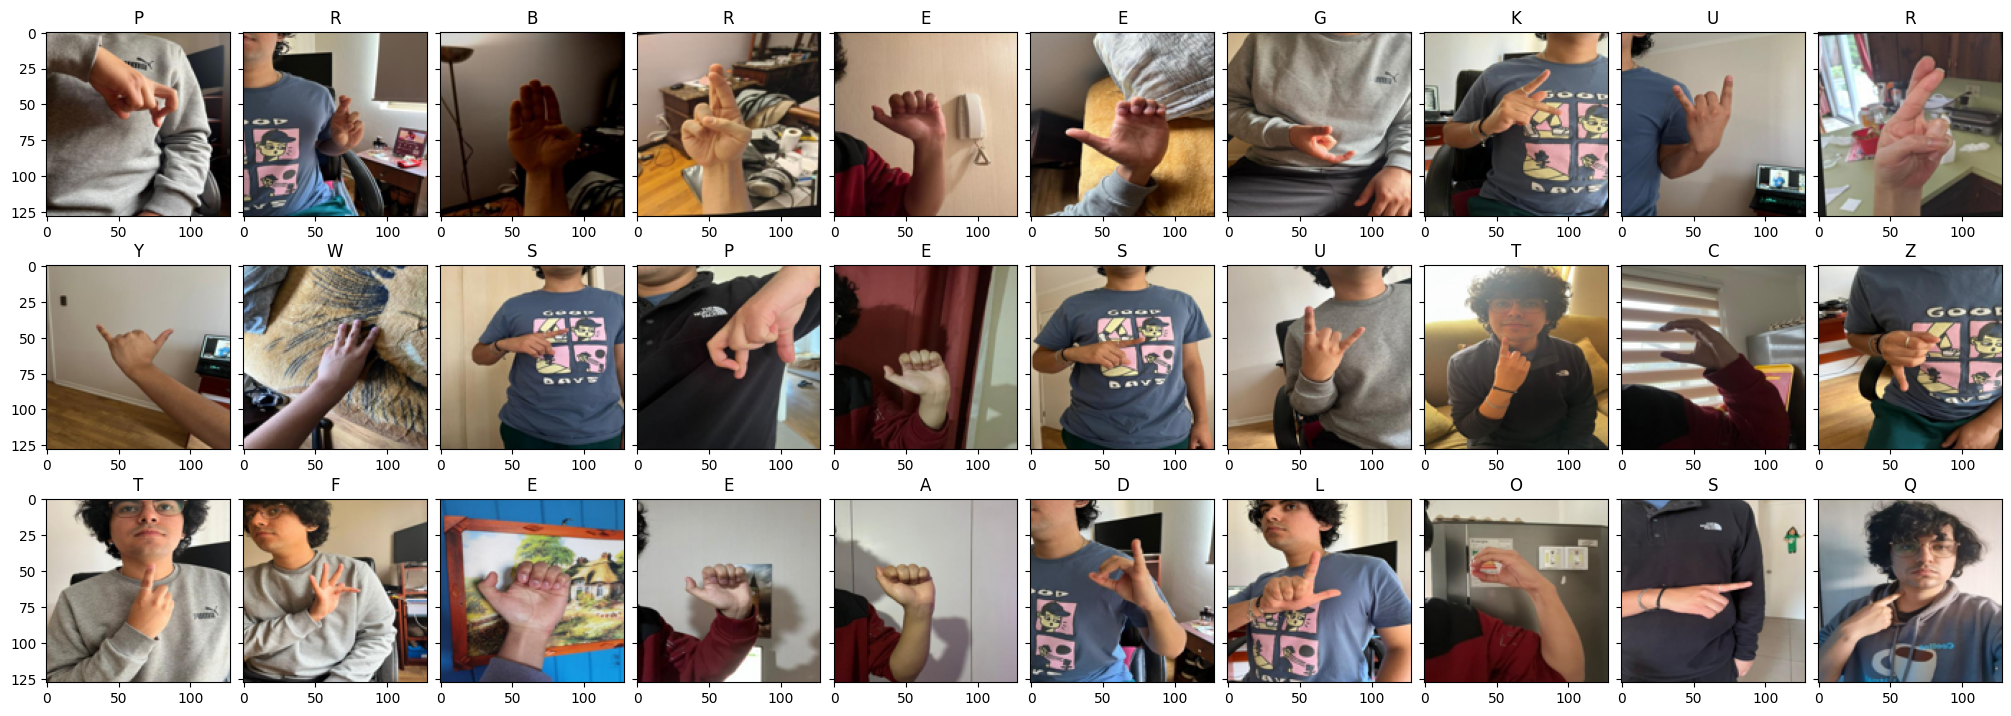

In [91]:
nrows_ = 3
ncols_ = 10
fig, axes = plt.subplots(nrows=nrows_, ncols=ncols_, figsize=(20, 7), sharey=True ,layout='constrained')
for ax, i in zip(axes.flat, range(nrows_*ncols_)):
  ax.imshow(valid_img[i],cmap='gray')
  ax.set_title(valid_labels[i])

# Pre procesamiento

### Separacion de datos

Previo al pre_procesamiento se separa las imagenes en las diferentes carpetas segun su clase. para hacer uso de la funcion ImageDataGeneretor

### Cargar los datos

los datos se encuentra repartidos en 3 carpetas distintas segun para el uso que decidamos hacer

In [92]:
#pasamos donde se encuentran los dataset de cada conjunto
data_entrenamiento='/content/drive/MyDrive/UGTO/DCI-data/lenguaje/train/data'
data_prueba='/content/drive/MyDrive/UGTO/DCI-data/lenguaje/test/data'
data_validacion='/content/drive/MyDrive/UGTO/DCI-data/lenguaje/valid/data'

In [115]:
#numero de pixeles
num_px=28
generador_entrenamiento = ImageDataGenerator(rescale=1./255,
                                             shear_range=0.3,
                                             zoom_range=0.3,
                                             horizontal_flip=True)
#Normalizacion de los datos
generador_prueba = ImageDataGenerator(rescale=1./255)

conjunto_entrenamiento = generador_entrenamiento.flow_from_directory(data_entrenamiento,
                                                                     target_size=(28, 28),
                                                                     batch_size=32,
                                                                     class_mode='categorical')

conjunto_prueba = generador_prueba.flow_from_directory(data_prueba,
                                                       target_size=(28, 28),
                                                       batch_size=32,
                                                       class_mode='categorical')

conjunto_validacion = generador_entrenamiento.flow_from_directory(data_entrenamiento,
                                                                     target_size=(28, 28),
                                                                     batch_size=32,
                                                                     class_mode='categorical')

Found 2304 images belonging to 26 classes.
Found 114 images belonging to 26 classes.
Found 2304 images belonging to 26 classes.


In [94]:
#Clases a identificar
indices=conjunto_entrenamiento.class_indices
print(indices)

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25}


### Funcion graficadora

en esta seccion se muestra la funcion con la que podemos graficar la perdida y accuracy tanto en el entrenamiento como el conjunto de prueba.

In [ ]:
def graficar_accuaracy_loss(historial):
  fig , ax = plt.subplots(1,2)
  fig.set_size_inches(16,3)

  epoch= np.linspace(1,len(historial.history['accuracy']),len(historial.history['accuracy']))

  ax[0].plot(epoch,historial.history['accuracy'],'go-',label='accuracy')
  ax[0].plot(epoch,historial.history['val_accuracy'],'ro-',label='val_accuracy')
  ax[0].set_title('accuracy')
  ax[0].grid()
  ax[0].set_xlabel("Epochs")
  ax[0].set_ylabel("Accuracy")
  ax[0].legend()

  ax[1].plot(epoch,historial.history['loss'],'go-',label='loss')
  ax[1].plot(epoch,historial.history['val_loss'],'ro-',label='val_loss')
  ax[1].set_title('loss')
  ax[1].grid()
  ax[1].set_xlabel('Epochs')
  ax[1].set_ylabel('loss')
  ax[1].legend()

#Primera aproximación

En esta red neuronal se parte de una de las formas mas basica en las que se puede abordar este problema, es decir, con capas densas, ademas se le añade una capa flatten por tema de las dimenciones en ya que es un conjunto de dimenciones de (x,x,3) ya que las imagenes tiene el formato de RGB.

Model: "sequential_28"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_63 (Dense)            (None, 28, 28, 516)       2064      
                                                                 
 dense_64 (Dense)            (None, 28, 28, 10)        5170      
                                                                 
 flatten_28 (Flatten)        (None, 7840)              0         
                                                                 
 dense_65 (Dense)            (None, 26)                203866    
                                                                 
Total params: 211100 (824.61 KB)
Trainable params: 211100 (824.61 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/10
72/72 [==============================] - 22s 287ms/step - loss: 3.1540 - accuracy: 0.0790 - val_loss: 3.0748 - val_accuracy: 0.0965
Ep

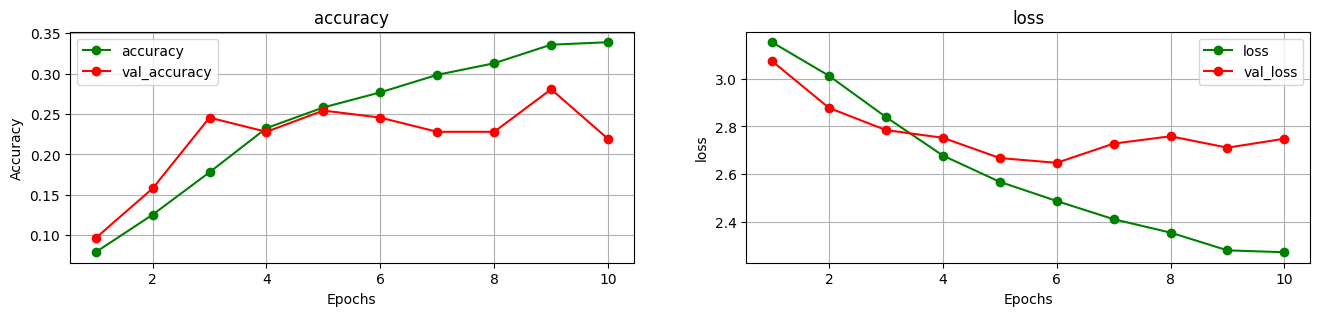

In [117]:
#modelo simple de capas densas en una estructura secuencial
model = Sequential([
    Dense(units=516, input_shape=(num_px,num_px, 3), activation='relu'),

    Dense(units=10, activation='relu'),
    Flatten(),
    Dense(units=26, activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

historial= model.fit(conjunto_entrenamiento,epochs=10,validation_data=conjunto_prueba)

graficar_accuaracy_loss(historial)

In [118]:
model.evaluate(conjunto_validacion)

72/72 [==============================] - 13s 183ms/step - loss: 2.2263 - accuracy: 0.3420


[2.2263011932373047, 0.3420138955116272]

Obsevacion:

Como podemos observar se encuentran con una notable carencia de eficiencia y control, aunque intentemos modificar nuestros arreglos en la arquitectura es notable que necesita mas cosas.

---

# Primera aquitectura convolucional

Esta arquitectura se basa en modelos utilizados para la clasificacion de imagenes, aunque en ejemplos encontrados con esta arquitectura, son eficientes, nuestro reto aqui se ve reflejado ya que el datasets utilizado no solo muestra las imagenes con el objeto a analizar (mano) si no que tambien se muestran diferentes fondos, estructuras y perspectiivas que analizar.

En esta red neuronal se modifico:
  * Se agrego 2 capas convolucionales 2D con un kernel de 3x3 con una activacion lineal.
  * Se agrego 2 capas MaxPooling2D de 2x2
  


Found 2304 images belonging to 26 classes.
Found 114 images belonging to 26 classes.
Found 222 images belonging to 26 classes.
Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_61 (Conv2D)          (None, 26, 26, 75)        2100      
                                                                 
 max_pooling2d_61 (MaxPooli  (None, 13, 13, 75)        0         
 ng2D)                                                           
                                                                 
 conv2d_62 (Conv2D)          (None, 11, 11, 50)        33800     
                                                                 
 max_pooling2d_62 (MaxPooli  (None, 5, 5, 50)          0         
 ng2D)                                                           
                                                                 
 flatten_31 (Flatten)        (None, 1250)              0  

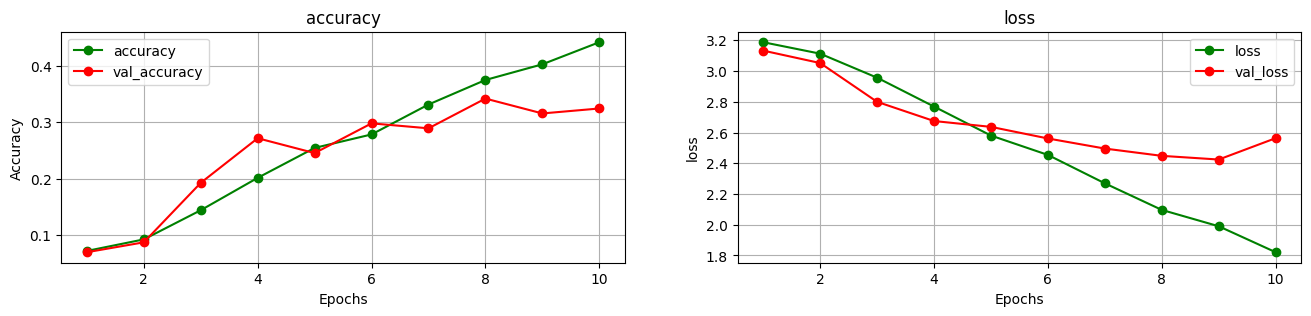

In [121]:
#resolucion de las imagenes en pixceles
num_px=28
#Cambiamos las dimensiones de los conjuntos
conjunto_entrenamiento = generador_entrenamiento.flow_from_directory( data_entrenamiento, target_size=(num_px, num_px),batch_size=32,class_mode='categorical')
conjunto_prueba = generador_prueba.flow_from_directory(               data_prueba,        target_size=(num_px, num_px),batch_size=32,class_mode='categorical')
conjunto_validacion = generador_entrenamiento.flow_from_directory(    data_validacion,    target_size=(num_px, num_px),batch_size=32,class_mode='categorical')

model1 = Sequential([
    Convolution2D(75, (3, 3), input_shape=(num_px, num_px, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Convolution2D(50, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(units=128, activation='relu'),
    Dense(units=26, activation='softmax')
])

model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model1.summary()
historial1= model1.fit(conjunto_entrenamiento,epochs=10,validation_data=conjunto_prueba)

graficar_accuaracy_loss(historial1)

Se notan cambios relativamente insignificante


---


## 128 pixceles
Modificacione:
  * aumentaremos el numero de caracteristicas usado en este caso a 128
  * se añade capas de BatchNormalization
  * se agregan  capas Dropout
  * se incorpora una capa mas de Convolucion2D con su respectiva Maxpool2D

In [ ]:
#resolucion de las imagenes en pixceles
num_px=128
#Cambiamos las dimensiones de los conjuntos
conjunto_entrenamiento = generador_entrenamiento.flow_from_directory( data_entrenamiento, target_size=(num_px, num_px),batch_size=32,class_mode='categorical')
conjunto_prueba = generador_prueba.flow_from_directory(               data_prueba,        target_size=(num_px, num_px),batch_size=32,class_mode='categorical')
conjunto_validacion = generador_entrenamiento.flow_from_directory(    data_validacion,    target_size=(num_px, num_px),batch_size=32,class_mode='categorical')

#modelo
model2 = Sequential()
model2.add(Convolution2D(75 , (5,5) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (num_px,num_px,3)))
model2.add(BatchNormalization())
model2.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model2.add(Convolution2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model2.add(Dropout(0.2))
model2.add(BatchNormalization())
model2.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model2.add(Convolution2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model2.add(BatchNormalization())
model2.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model2.add(Flatten())
model2.add(Dense(units = 512 , activation = 'relu'))
model2.add(Dropout(0.3))
model2.add(Dense(units = 26 , activation = 'softmax'))
model2.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
historial2= model2.fit(conjunto_entrenamiento,epochs=30,validation_data=conjunto_validacion)

graficar_accuaracy_loss(historial2)

Found 2304 images belonging to 26 classes.
Found 114 images belonging to 26 classes.
Found 222 images belonging to 26 classes.
Epoch 1/30
72/72 [==============================] - 215s 2s/step - loss: 3.5101 - accuracy: 0.1224 - val_loss: 4.7715 - val_accuracy: 0.0766
Epoch 2/30
72/72 [==============================] - 59s 823ms/step - loss: 2.7359 - accuracy: 0.2205 - val_loss: 7.1475 - val_accuracy: 0.0721
Epoch 3/30
72/72 [==============================] - 58s 805ms/step - loss: 2.4657 - accuracy: 0.2886 - val_loss: 10.2471 - val_accuracy: 0.0315
Epoch 4/30
72/72 [==============================] - 66s 912ms/step - loss: 2.1788 - accuracy: 0.3459 - val_loss: 8.6178 - val_accuracy: 0.0315
Epoch 5/30
72/72 [==============================] - 57s 790ms/step - loss: 1.9218 - accuracy: 0.4332 - val_loss: 7.9450 - val_accuracy: 0.0450
Epoch 6/30
72/72 [==============================] - 57s 794ms/step - loss: 1.6269 - accuracy: 0.5143 - val_loss: 5.7562 - val_accuracy: 0.1081
Epoch 7/30
72/72

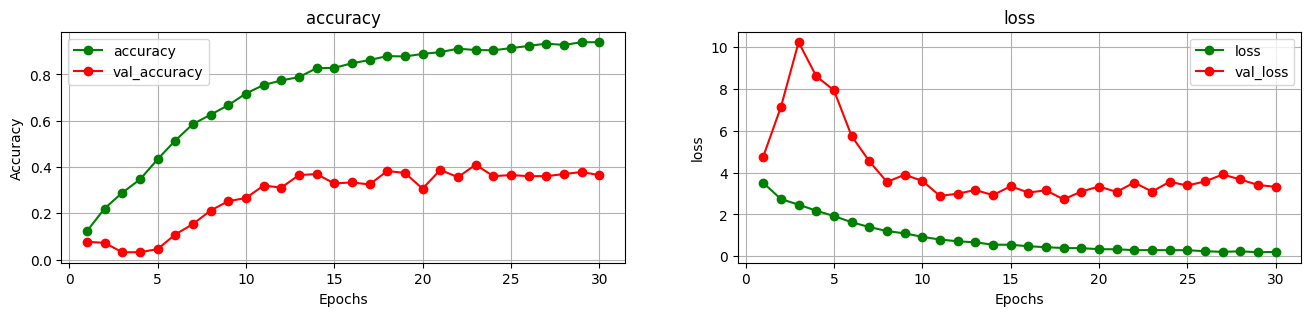

In [ ]:
graficar_accuaracy_loss(historial2)


 ---

bacht size: cuando se entrena una red se tiene que ingresar las imágenes en ella, puede ser de una por una o varias. La desventaja de hacerlo de una por una es que no se utilizan todos los recursos disponibles, por lo tanto el tiempo de procesamiento de datos es largo. La otra forma es ingresar varias imágenes y procesarlas en paralelo dependiendo de los recursos que se tengan.

La cantidad de lotes depende de la cantidad de memoria RAM que se tenga en la CPU o GPU, si la cantidad de información sobrepasa la memoria no podrá entrenar
la red











 Es que según yo sí debe ser sobreajuste

 Intenta cambiando la configuración de la red
 Porque puede ser que también sea demasiado profunda
 Para el dataset que estás usando
O estás usando demasiado dropout y sucede que ahora no aprende bien
 También puedes cambiar el número de filtros en las capas convolucionales


 Y hay que estar variando los parámetros de las capas, la profundidad, el batch size

# arquitectura mejor

Found 2304 images belonging to 26 classes.
Found 114 images belonging to 26 classes.
Found 222 images belonging to 26 classes.
Epoch 1/30
154/154 [==============================] - 46s 288ms/step - loss: 3.4044 - accuracy: 0.1037 - val_loss: 4.0430 - val_accuracy: 0.0614
Epoch 2/30
154/154 [==============================] - 43s 278ms/step - loss: 2.8904 - accuracy: 0.1758 - val_loss: 5.4938 - val_accuracy: 0.0175
Epoch 3/30
154/154 [==============================] - 45s 292ms/step - loss: 2.5879 - accuracy: 0.2378 - val_loss: 3.6983 - val_accuracy: 0.0877
Epoch 4/30
154/154 [==============================] - 44s 285ms/step - loss: 2.3389 - accuracy: 0.3147 - val_loss: 2.8180 - val_accuracy: 0.2368
Epoch 5/30
154/154 [==============================] - 45s 289ms/step - loss: 2.0915 - accuracy: 0.3646 - val_loss: 3.0161 - val_accuracy: 0.2281
Epoch 6/30
154/154 [==============================] - 46s 296ms/step - loss: 1.7743 - accuracy: 0.4666 - val_loss: 2.8706 - val_accuracy: 0.3246
Epo

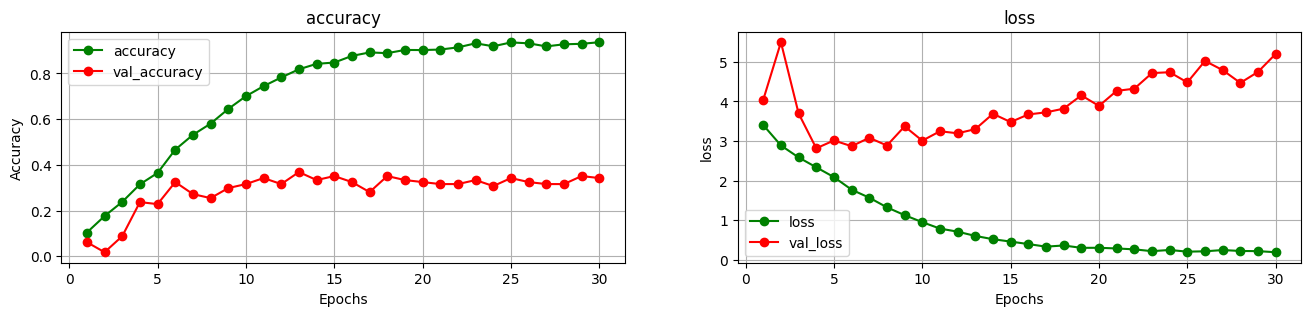

In [125]:
#resolucion de las imagenes en pixceles
num_px=28
#Cambiamos las dimensiones de los conjuntos
conjunto_entrenamiento = generador_entrenamiento.flow_from_directory( data_entrenamiento, target_size=(num_px, num_px),batch_size=15,class_mode='categorical')
conjunto_prueba = generador_prueba.flow_from_directory(               data_prueba,        target_size=(num_px, num_px),batch_size=15,class_mode='categorical')
conjunto_validacion = generador_entrenamiento.flow_from_directory(    data_validacion,    target_size=(num_px, num_px),batch_size=15,class_mode='categorical')

#modelo
model2 = Sequential()
model2.add(Convolution2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (num_px,num_px,3)))
model2.add(BatchNormalization())
model2.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model2.add(Convolution2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model2.add(Dropout(0.2))
model2.add(BatchNormalization())
model2.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model2.add(Convolution2D(64, (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model2.add(BatchNormalization())
model2.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model2.add(Flatten())
model2.add(Dense(units = 256 , activation = 'relu'))
model2.add(Dense(units = 26 , activation = 'softmax'))
model2.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
historial3= model2.fit(conjunto_entrenamiento,epochs=30,validation_data=conjunto_prueba)

graficar_accuaracy_loss(historial3)

como podemos observar el valor

---




In [1]:
#resolucion de las imagenes en pixceles
num_px=416
#Cambiamos las dimensiones de los conjuntos
conjunto_entrenamiento = generador_entrenamiento.flow_from_directory( data_entrenamiento, target_size=(num_px, num_px),batch_size=15,class_mode='categorical')
conjunto_prueba = generador_prueba.flow_from_directory(               data_prueba,        target_size=(num_px, num_px),batch_size=15,class_mode='categorical')
conjunto_validacion = generador_entrenamiento.flow_from_directory(    data_validacion,    target_size=(num_px, num_px),batch_size=15,class_mode='categorical')

#modelo
model2 = Sequential()
model2.add(Convolution2D(256 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (num_px,num_px,3)))
model2.add(BatchNormalization())
model2.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model2.add(Convolution2D(128 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model2.add(Dropout(0.2))
model2.add(BatchNormalization())
model2.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model2.add(Convolution2D(64, (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model2.add(BatchNormalization())
model2.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model2.add(Flatten())
model2.add(Dense(units = 512 , activation = 'relu'))
model2.add(Dense(units = 26 , activation = 'softmax'))
model2.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
historial4= model2.fit(conjunto_entrenamiento,epochs=5,validation_data=conjunto_prueba)

graficar_accuaracy_loss(historial4)

NameError: ignored

# Conclusion